# Prima Diabetes Data
<hr>

In [23]:
import pandas as pd
import numpy as np

In [28]:
prima_pd = pd.read_csv('pima_diabetes.csv')

In [29]:
prima_pd.head()

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
prima_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [31]:
prima_pd.shape

(768, 9)

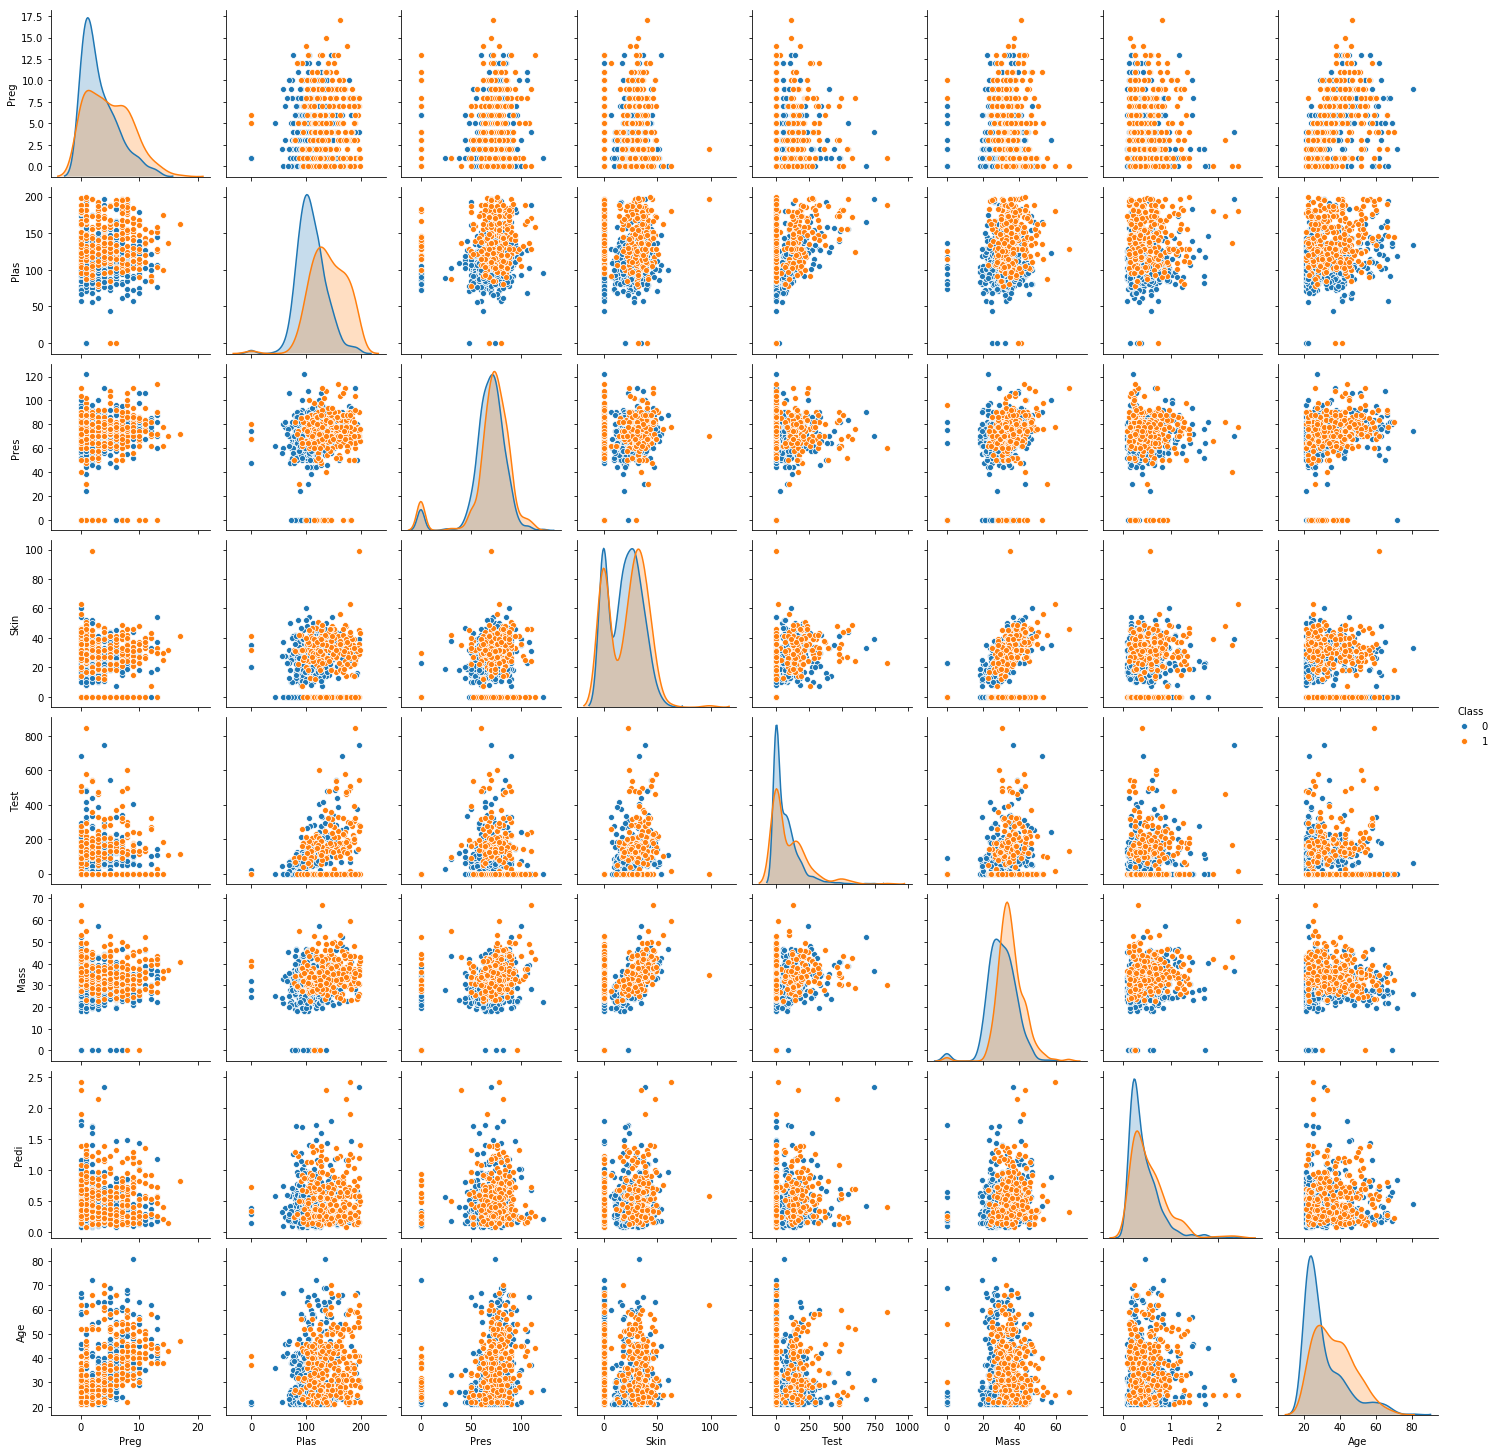

In [32]:
import seaborn as sns
sns.pairplot(prima_pd, diag_kind="kde", hue = "Class")

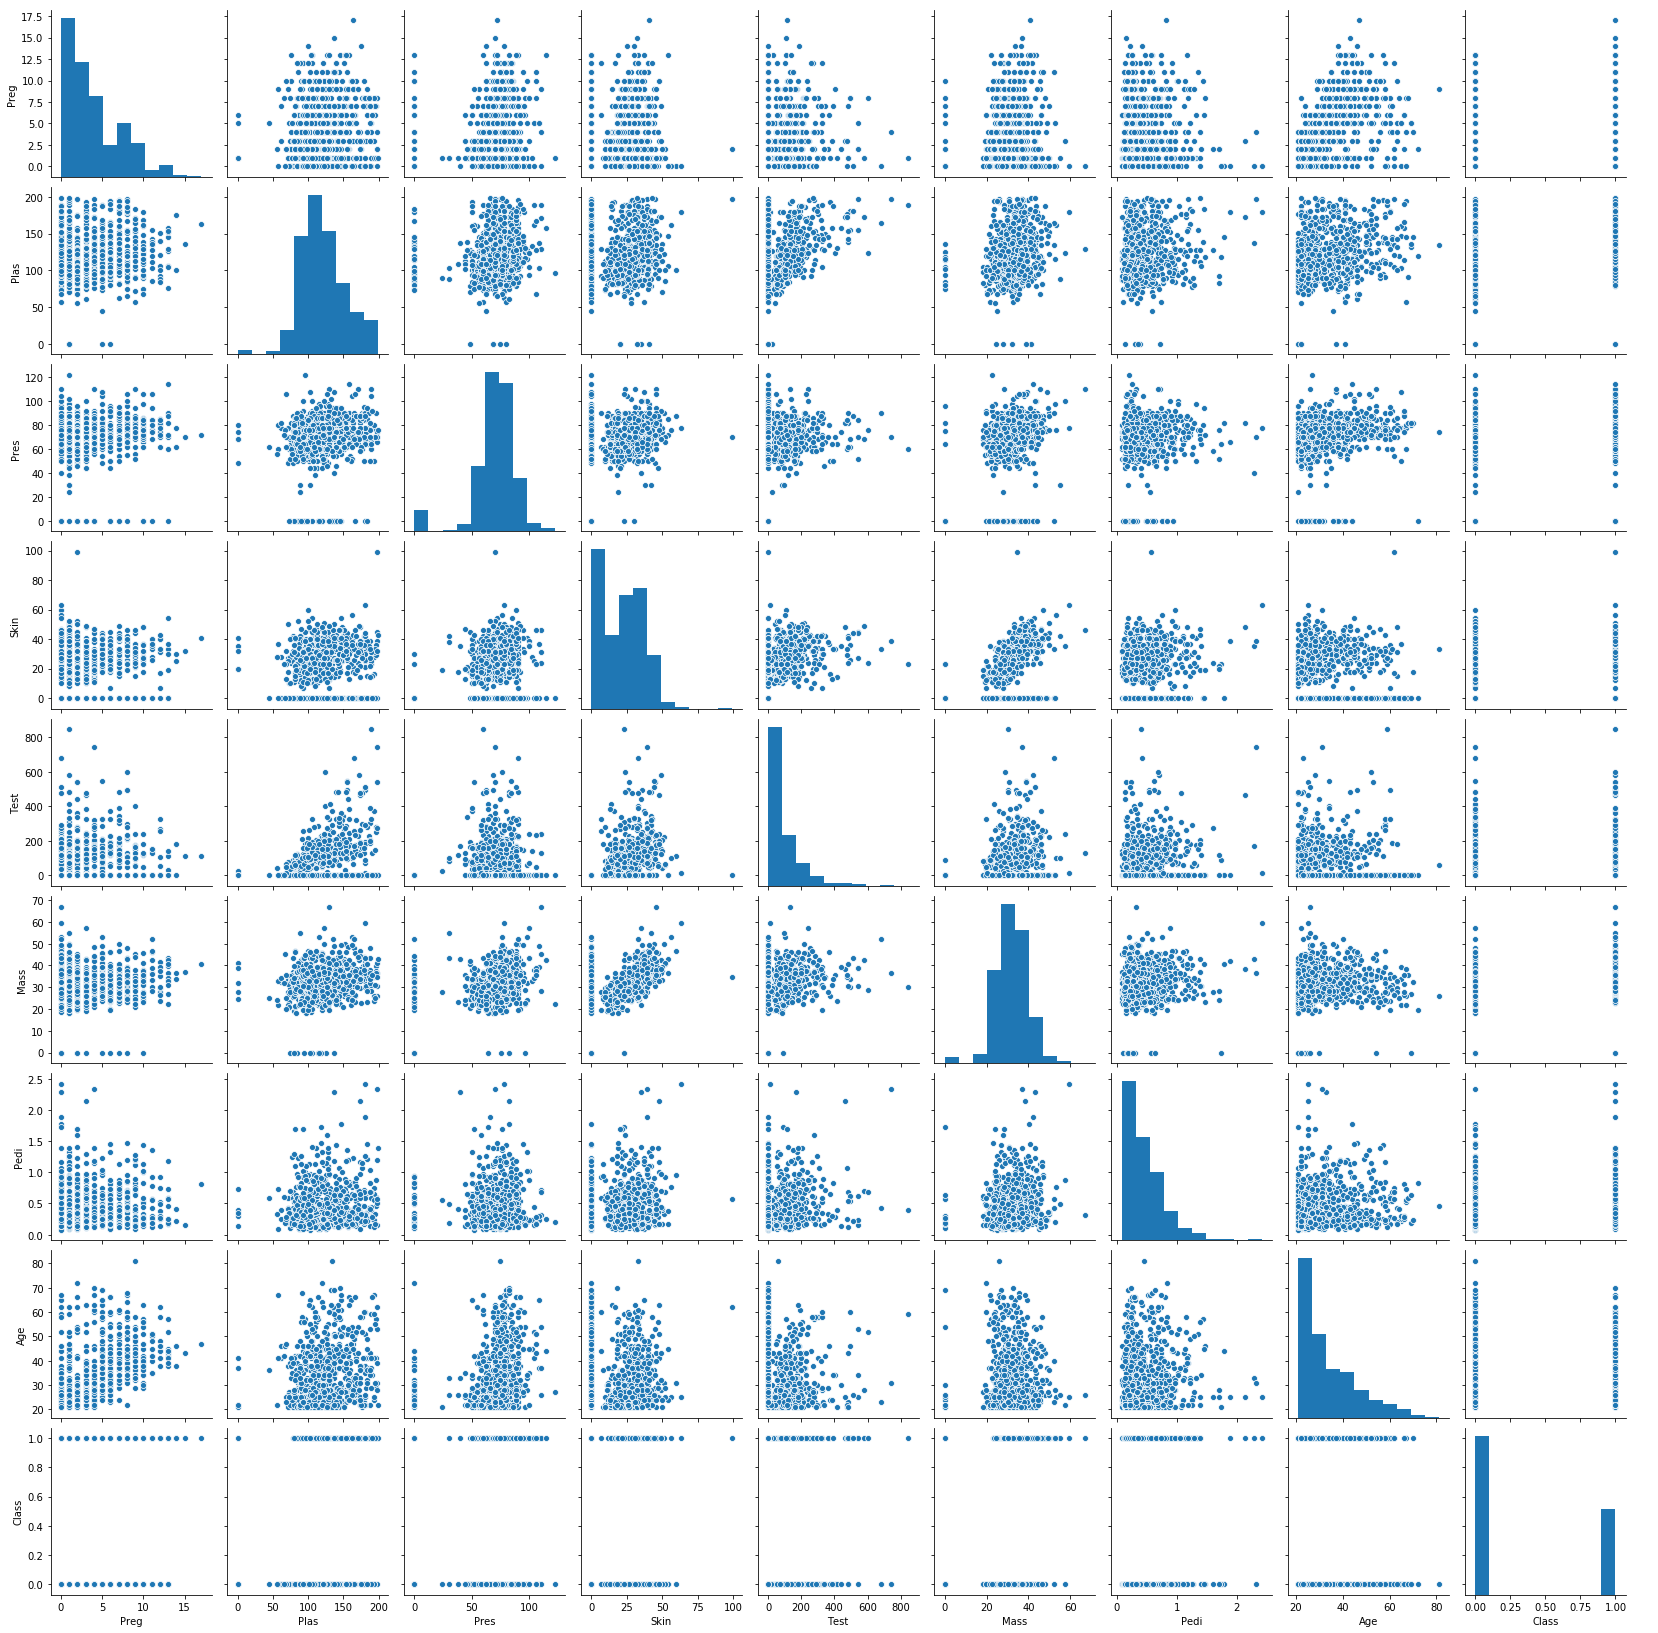

In [128]:
sns.pairplot(prima_pd)

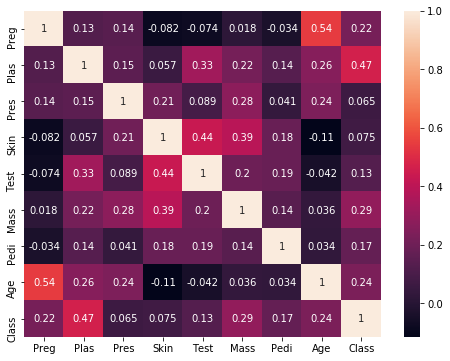

In [113]:
plt.figure(figsize = (8,6))
sns.heatmap(prima_pd.corr(),annot = True)

In [114]:
X = prima_pd.drop('Class',axis=1)
y = prima_pd['Class']

In [115]:
# X = prima_pd.drop(columns=['Class','Test', 'Skin', 'Pres'],axis=1)
# y = prima_pd['Class']

In [116]:
X.columns

Index(['Preg', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age'], dtype='object')

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [120]:
# Fit only to the training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
#Multi-layer Perceptron classifier.

from sklearn.neural_network import MLPClassifier

In [122]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=2000, activation = 'relu', random_state=10)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

In [123]:
from sklearn.metrics import classification_report,confusion_matrix
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))
print(confusion_matrix(y_test,y_pred))

0.8472998137802608
0.7575757575757576
[[135  22]
 [ 34  40]]


In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       157
           1       0.65      0.54      0.59        74

    accuracy                           0.76       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [125]:
def run_iterations(start, end):
    training_accuracy = []
    test_accuracy = []
    neuron_range = range(start, end)
    for neurons in neuron_range:
        results =[]
        # define Hidden layers
        hidden_layers = (neurons, neurons)
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter = 2000 , activation = 'relu', random_state=0)
        mlp.fit(X_train, y_train)
        # Train and Test scores
        training_accuracy.append(mlp.score(X_train, y_train))
        test_accuracy.append(mlp.score(X_test, y_test))
        # capture results
        results.append(hidden_layers)
        results.append(mlp.score(X_train, y_train))
        results.append(mlp.score(X_test, y_test))
        #print("Hidden Layer", hidden_layers)
        print(results)
        print()
    plt.plot(training_accuracy, label="training accuracy")
    plt.plot(test_accuracy, '--', label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Run number")
    plt.legend()
    plt.show()

[(2, 2), 0.7690875232774674, 0.7835497835497836]

[(3, 3), 0.7690875232774674, 0.7748917748917749]

[(4, 4), 0.7932960893854749, 0.7619047619047619]

[(5, 5), 0.8119180633147114, 0.7792207792207793]

[(6, 6), 0.7914338919925512, 0.7705627705627706]

[(7, 7), 0.8249534450651769, 0.7662337662337663]

[(8, 8), 0.8435754189944135, 0.7922077922077922]

[(9, 9), 0.851024208566108, 0.7748917748917749]



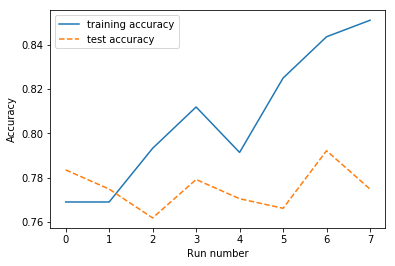

In [126]:
import matplotlib.pyplot as plt
run_iterations(2,10)